### Import necessary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Import a 311 NYC service request.

In [2]:
df=pd.read_csv("E:/e drive data\Data science with python/Data-Science-with-Python-Project-2--master/Data-Science-with-Python-Project-2--master/311_Service_Requests_from_2010_to_Present.csv")
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [3]:
df.shape

(300698, 53)

In [4]:
df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 42 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300698 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [6]:
df.drop(columns=df.loc[:,"School or Citywide Complaint":"Ferry Terminal Name"],inplace=True)

In [9]:
# fill the null values Location type to Unknown Location and City to Unknown City
df.fillna({"Location Type":"Unknown Location","City":"Unknown City"},inplace=True)

In [14]:
df["Closed Date"].fillna(df["Closed Date"].mode()[0],inplace=True)

####  convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing

In [15]:
df["Created Date"]=pd.to_datetime(df["Created Date"])
df["Closed Date"]=pd.to_datetime(df["Closed Date"])

In [16]:
df.dtypes

Unique Key                                 int64
Created Date                      datetime64[ns]
Closed Date                       datetime64[ns]
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                             float64
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Intersection Street 1                     object
Intersection Street 2                     object
Address Type                              object
City                                      object
Landmark                                  object
Facility Type                             object
Status                                    object
Due Date            

In [17]:
df["Request_Closing_Time"]=df["Closed Date"]-df["Created Date"]

In [18]:
df["Request_Closing_Time"].head()

0   0 days 00:55:15
1   0 days 01:26:16
2   0 days 04:51:31
3   0 days 07:45:14
4   0 days 03:27:02
Name: Request_Closing_Time, dtype: timedelta64[ns]

In [19]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'Latitude', 'Longitude', 'Location',
       'Request_Closing_Time'],
      dtype='object')

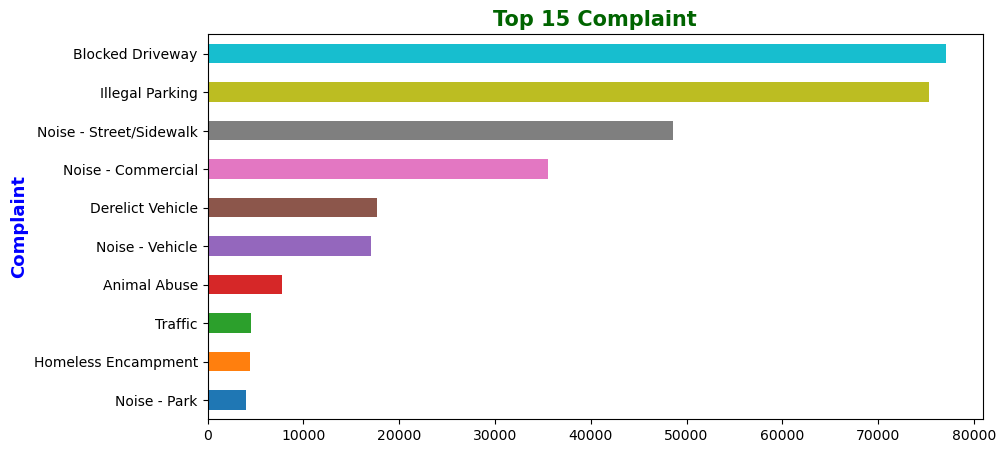

In [57]:
# top 10 complaint type
plt.figure(figsize=(10,5))
df["Complaint Type"].value_counts().nlargest(10).sort_values(ascending=True).plot.barh(color=sns.color_palette("tab10"))
plt.title("Top 15 Complaint",size=15,c="darkgreen",weight="bold")
plt.ylabel("Complaint",size=13,c="b",rotation=90,weight="bold")
plt.show()

Status
Closed      298471
Open          1439
Assigned       786
Draft            2
Name: count, dtype: int64


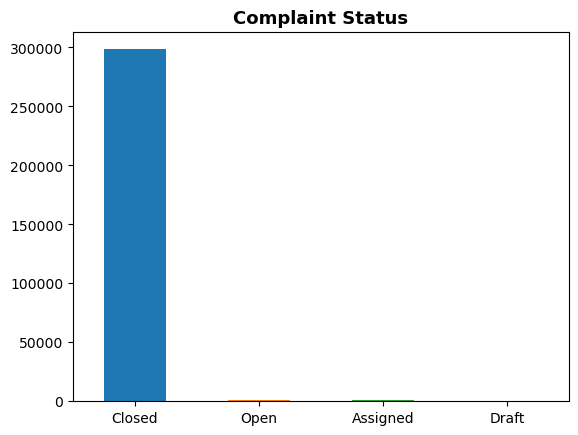

In [35]:
print(df.Status.value_counts())
df.Status.value_counts().plot.bar(color=sns.color_palette())
plt.title("Complaint Status",fontsize=13,weight="bold")
plt.xlabel("")
plt.xticks(rotation=0)

plt.show()

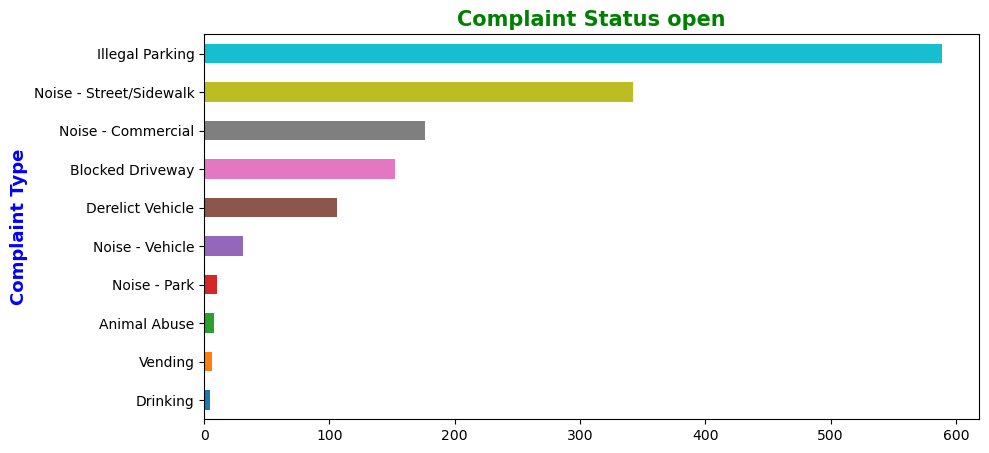

In [49]:
# Complaint status are still open
plt.figure(figsize=(10,5))
df[df.Status=="Open"].groupby(["Complaint Type"]).Status.count().nlargest(10).sort_values(ascending=True).plot.barh(color=sns.color_palette())
plt.title("Complaint Status open",size=15,c="g", weight="bold")
plt.ylabel("Complaint Type",size=13,c="b",weight="bold")
plt.show()

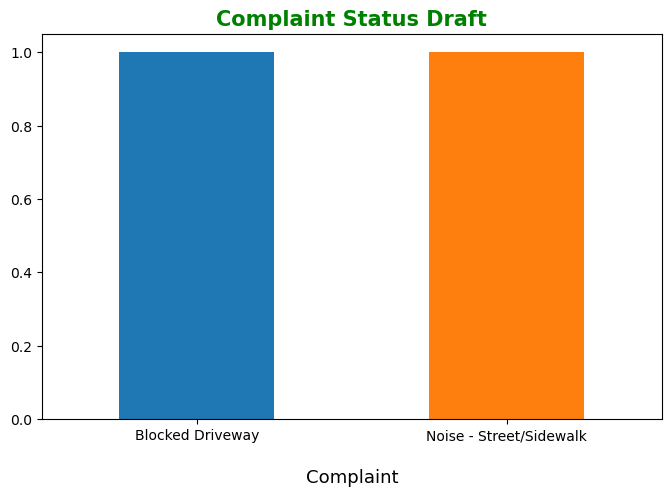

In [50]:
# Complaint status are still Draft
plt.figure(figsize=(8,5))
df[df.Status=="Draft"].groupby(["Complaint Type"]).Status.count().nlargest(10).sort_values(ascending=True).plot.bar(color=sns.color_palette())
plt.title("Complaint Status Draft",size=15,c="g", weight="bold")
plt.xlabel("\nComplaint",fontsize=13)
plt.xticks(rotation=0)
plt.show()

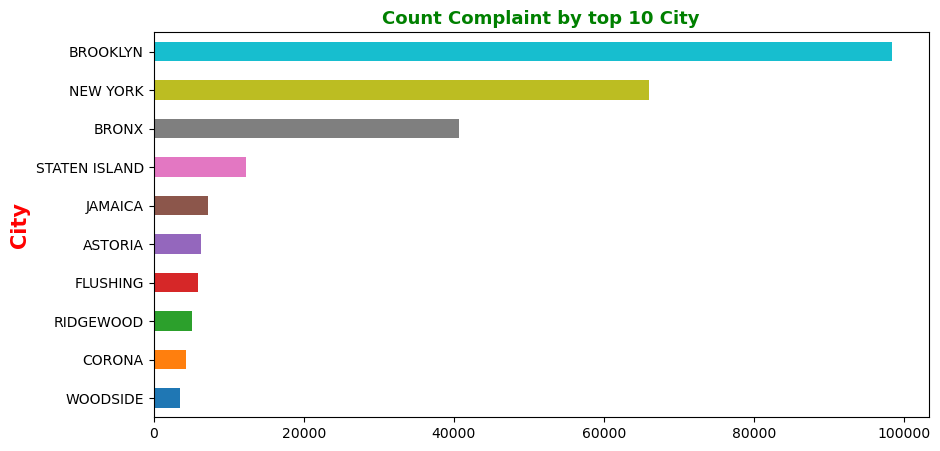

In [74]:
# City wise Complaint Count
df.groupby("City")["Complaint Type"].count().nlargest(10).sort_values(ascending=True).plot.barh(figsize=(10,5),color=sns.color_palette())
plt.title("Count Complaint by top 10 City",size=13,c="g",weight="bold",ha="center")
plt.ylabel("City",size=15,c="r",weight="bold")

plt.show()

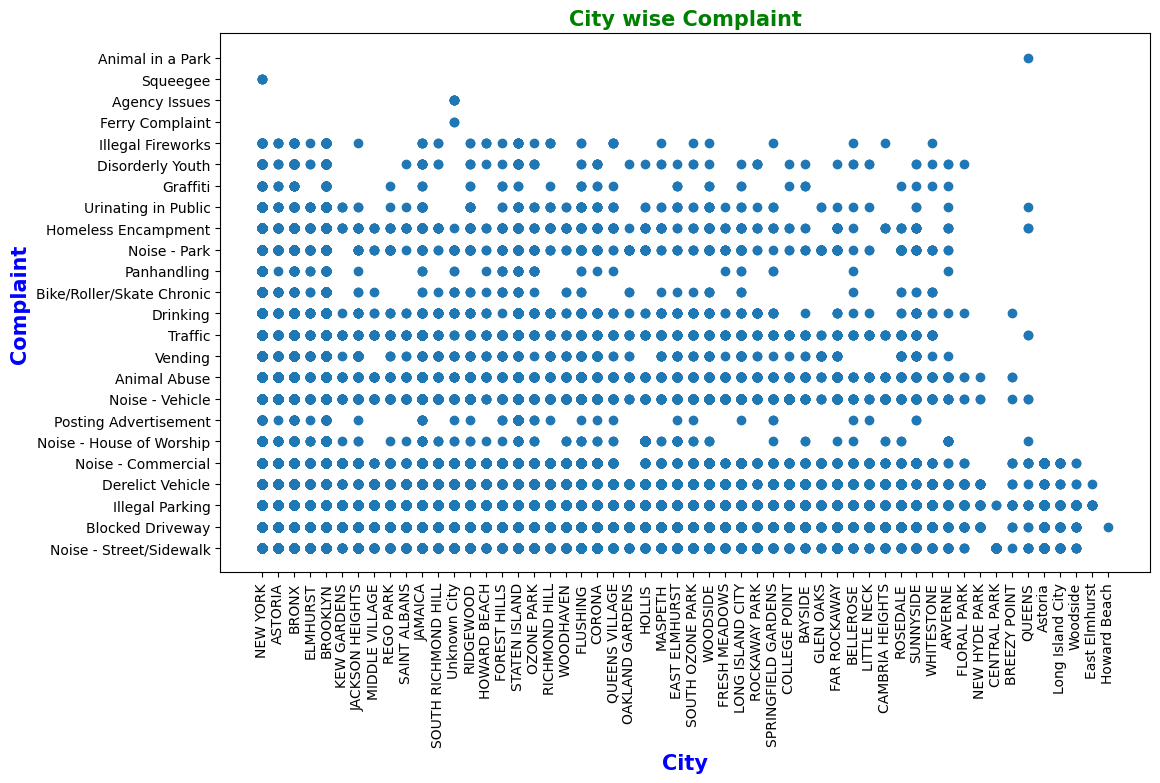

In [66]:
plt.figure(figsize=(12,7))
plt.scatter(df["City"],df["Complaint Type"])
plt.xticks(rotation=90)
plt.title("City wise Complaint",fontsize=15,c="g",weight="bold")
plt.xlabel("City",fontsize=15,c="blue",weight="bold")
plt.ylabel("Complaint",size=15,c="blue",weight="bold")
plt.show()

In [67]:
df["Location Type"].value_counts()

Location Type
Street/Sidewalk               249299
Store/Commercial               20381
Club/Bar/Restaurant            17360
Residential Building/House      6960
Park/Playground                 4773
House of Worship                 929
Residential Building             227
Highway                          215
Unknown Location                 131
Parking Lot                      117
House and Store                   93
Vacant Lot                        77
Commercial                        62
Roadway Tunnel                    35
Subway Station                    34
Bridge                             2
Terminal                           1
Ferry                              1
Park                               1
Name: count, dtype: int64

In [68]:
df.groupby(by=["Complaint Type","Location Type"]).Request_Closing_Time.mean().nlargest(30)

Complaint Type            Location Type             
Ferry Complaint           Ferry                                 124 days 22:22:00
                          Terminal                               96 days 23:06:00
Noise - Street/Sidewalk   Unknown Location             20 days 00:30:04.363636363
Noise - Commercial        Unknown Location                18 days 08:18:45.500000
Animal in a Park          Park                                   14 days 00:50:05
Derelict Vehicle          Highway                       8 days 14:14:35.071428571
Noise - Street/Sidewalk   Street/Sidewalk               1 days 06:27:03.617970823
Vending                   Park/Playground               1 days 04:42:26.896226415
Noise - Commercial        Club/Bar/Restaurant           1 days 04:09:15.691568962
Panhandling               Street/Sidewalk               1 days 04:01:06.106666666
Illegal Parking           Street/Sidewalk               1 days 02:13:07.497278496
Noise - Commercial        Store/Commercial   

In [70]:
# the average response time across complaint
df.groupby(by="Complaint Type").Request_Closing_Time.mean().sort_values(ascending=False)

Complaint Type
Ferry Complaint                     110 days 22:44:00
Animal in a Park                     14 days 00:50:05
Noise - Street/Sidewalk     1 days 06:33:10.235024273
Noise - Commercial          1 days 02:49:53.316271748
Illegal Parking             1 days 02:12:32.465691803
Panhandling                 0 days 21:40:37.599348534
Derelict Vehicle            0 days 21:33:22.494525341
Noise - Park                0 days 15:53:57.561603166
Noise - Vehicle             0 days 11:43:06.735233858
Blocked Driveway            0 days 10:58:05.892048699
Noise - House of Worship    0 days 10:12:54.067669172
Vending                     0 days 09:42:18.392688058
Graffiti                    0 days 07:09:04.504424778
Animal Abuse                0 days 07:05:55.768706608
Posting Advertisement       0 days 06:46:19.424615384
Agency Issues               0 days 05:15:37.166666666
Drinking                    0 days 04:35:49.101562500
Homeless Encampment         0 days 04:21:56.052536231
Squeegee     

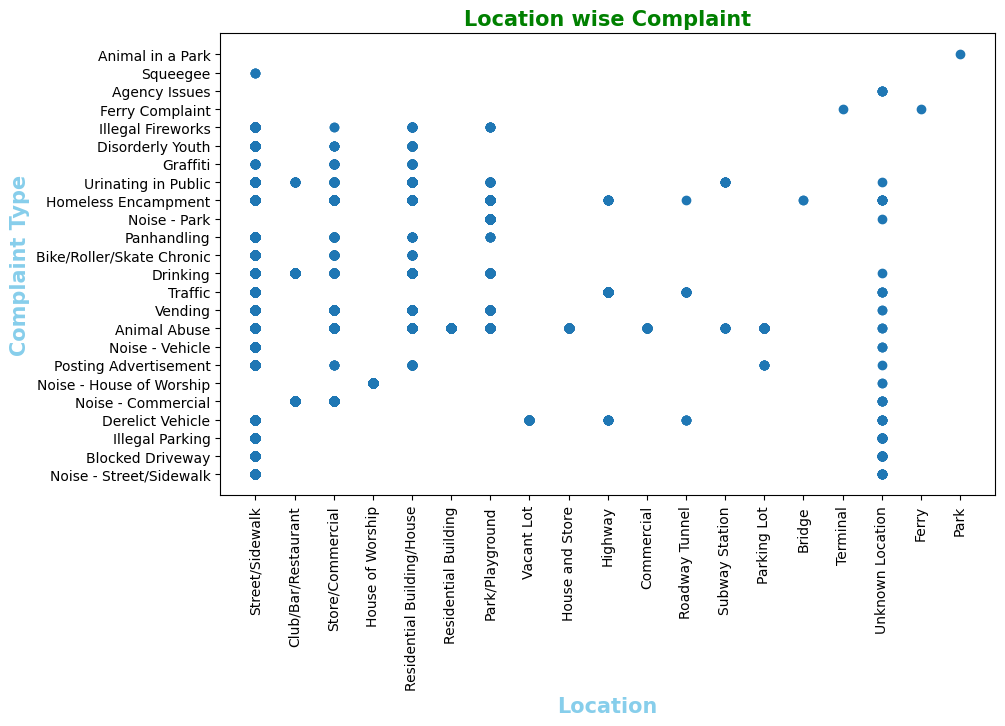

In [73]:
# Complaint Type Based Location
plt.figure(figsize=(10,6))
plt.scatter(x=df["Location Type"],y=df["Complaint Type"])
plt.title("Location wise Complaint",fontsize=15,c="g",weight="bold")
plt.xticks(rotation=90)
plt.xlabel("Location",c="skyblue",size=15,weight="bold")
plt.ylabel("Complaint Type",c="skyblue",size=15,weight="bold")
plt.show()